In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [10]:
tree = DecisionTreeClassifier(random_state=0)

In [11]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [12]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [13]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [14]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

In [15]:
import graphviz


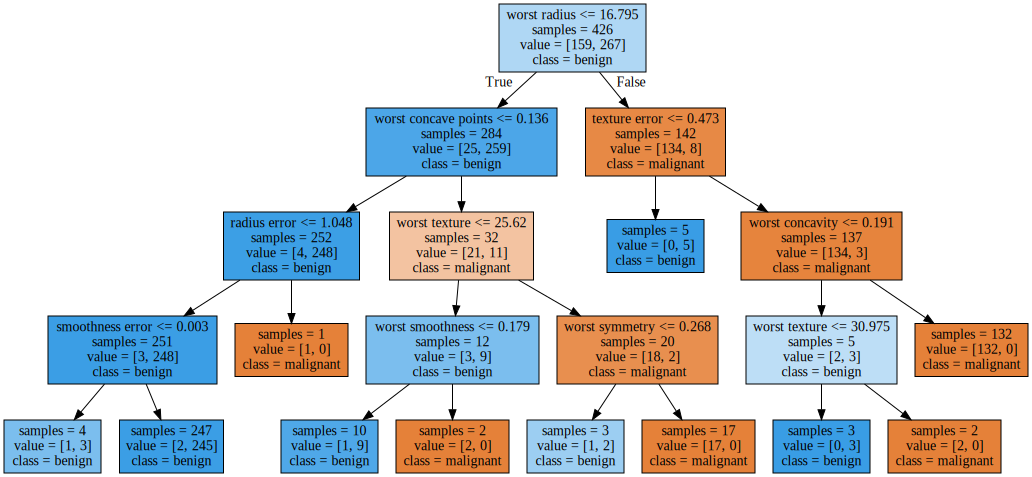

In [16]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [17]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


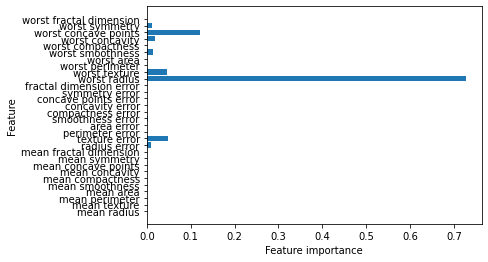

In [18]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)


Feature importances: [0. 1.]


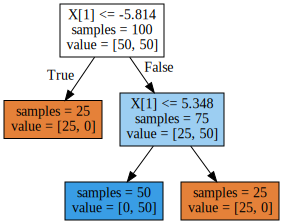

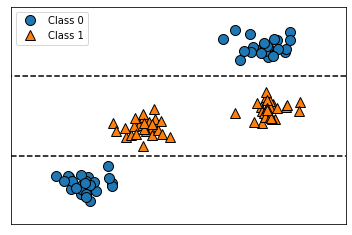

In [19]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)


Text(0, 0.5, 'Price in $/Mbyte')

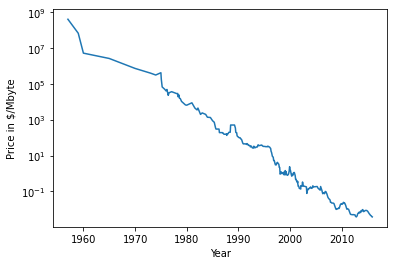

In [20]:
import pandas as pd
ram_prices = pd.read_csv("ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [22]:
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

<ipython-input-22-35d343e2bb5d>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]


In [23]:
tree = DecisionTreeRegressor().fit(X_train, y_train)

In [24]:
linear_reg = LinearRegression().fit(X_train, y_train)

In [25]:
X_all = ram_prices.date[:, np.newaxis]

<ipython-input-25-0580efa9602a>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


In [26]:
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)


In [27]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

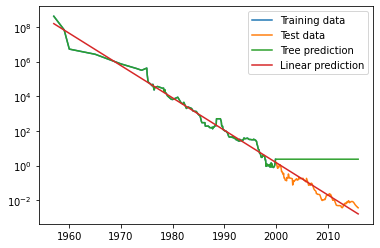

In [28]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

In [29]:
#   RANDOM FORESTS

In [30]:
#  MOON DATASET

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [32]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state= 42)

In [34]:
forest = RandomForestClassifier(n_estimators=5, random_state= 2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

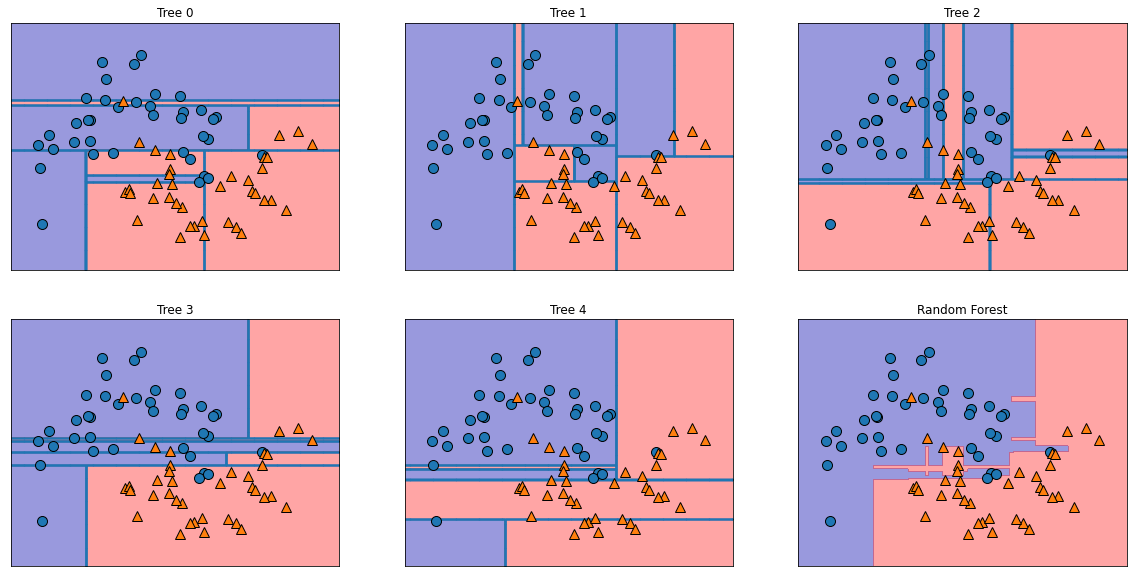

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)